# IMDB Sentiment Analysis - Model Evaluation & Comparison

This notebook evaluates and compares the trained models.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from src.models import load_model
from src.evaluation import (
    evaluate_model, plot_confusion_matrix, extract_top_features,
    plot_feature_importance, plot_roc_curves, compare_models
)
from src.utils import ensure_dir

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Load Models and Data

In [2]:
# Load models
nb_model = load_model('../models/naive_bayes_model.pkl')
lr_model = load_model('../models/logistic_regression_model.pkl')

# Load vectorizer
with open('../models/tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
print("Vectorizer loaded")

# Load test data
data = np.load('../models/train_test_data.npz', allow_pickle=True)
X_test = data['X_test'].item()
y_test = data['y_test']
print(f"\nTest set shape: {X_test.shape}")

Model loaded from ../models/naive_bayes_model.pkl
Model loaded from ../models/logistic_regression_model.pkl
Vectorizer loaded

Test set shape: (10000, 5000)


## 2. Evaluate Naive Bayes

In [3]:
# Evaluate Naive Bayes
print("Evaluating Naive Bayes...\n")
nb_results = evaluate_model(nb_model, X_test, y_test)

print("Metrics:")
for metric, value in nb_results['metrics'].items():
    print(f"  {metric}: {value:.4f}")

print("\nClassification Report:")
print(nb_results['classification_report'])

Evaluating Naive Bayes...

Metrics:
  accuracy: 0.8644
  precision: 0.8546
  recall: 0.8782
  f1_score: 0.8662

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86      5000
    Positive       0.85      0.88      0.87      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## 3. Evaluate Logistic Regression

In [4]:
# Evaluate Logistic Regression
print("Evaluating Logistic Regression...\n")
lr_results = evaluate_model(lr_model, X_test, y_test)

print("Metrics:")
for metric, value in lr_results['metrics'].items():
    print(f"  {metric}: {value:.4f}")

print("\nClassification Report:")
print(lr_results['classification_report'])

Evaluating Logistic Regression...

Metrics:
  accuracy: 0.8987
  precision: 0.8913
  recall: 0.9082
  f1_score: 0.8997

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      5000
    Positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## 4. Confusion Matrices

Confusion matrix saved to ../results/confusion_matrices/naive_bayes_cm.png


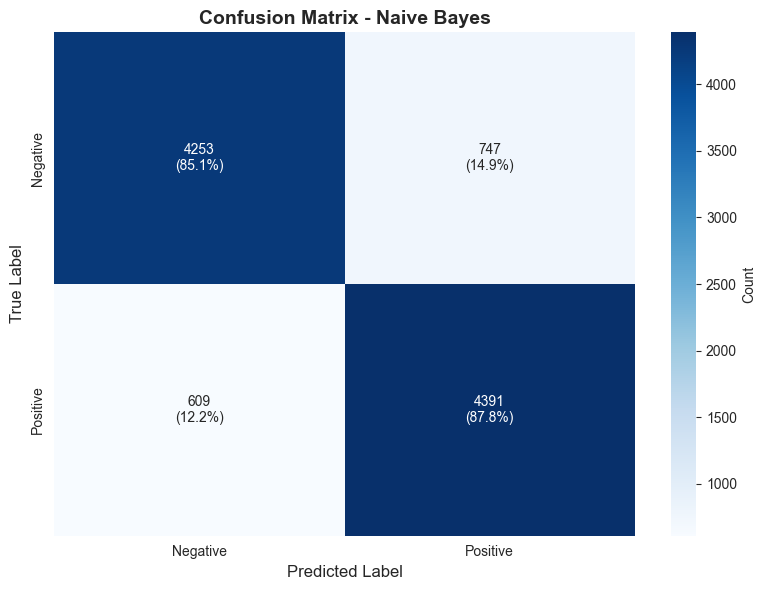

In [5]:
# Ensure results directory exists
ensure_dir('../results/confusion_matrices')

# Plot Naive Bayes confusion matrix
plot_confusion_matrix(
    y_test,
    nb_results['predictions'],
    'Naive Bayes',
    '../results/confusion_matrices/naive_bayes_cm.png'
)

Confusion matrix saved to ../results/confusion_matrices/logistic_regression_cm.png


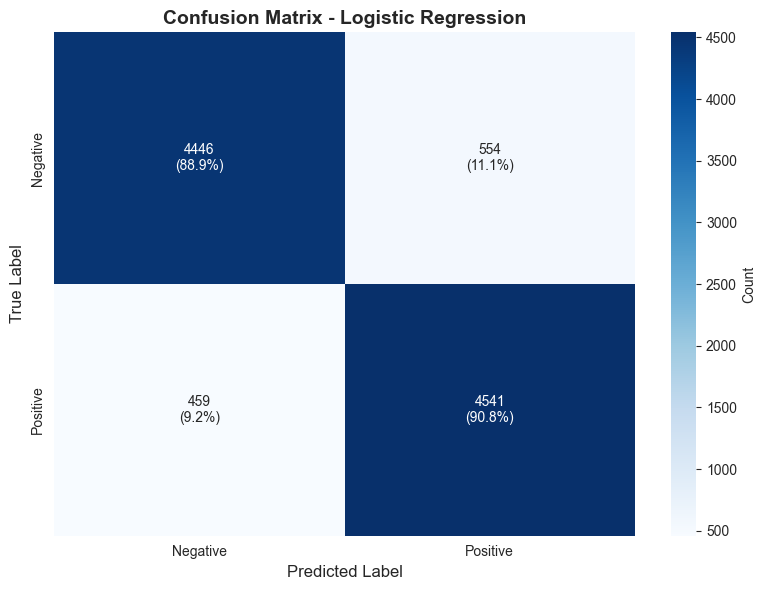

In [6]:
# Plot Logistic Regression confusion matrix
plot_confusion_matrix(
    y_test,
    lr_results['predictions'],
    'Logistic Regression',
    '../results/confusion_matrices/logistic_regression_cm.png'
)

## 5. ROC Curves

ROC curves saved to ../results/roc_curves.png


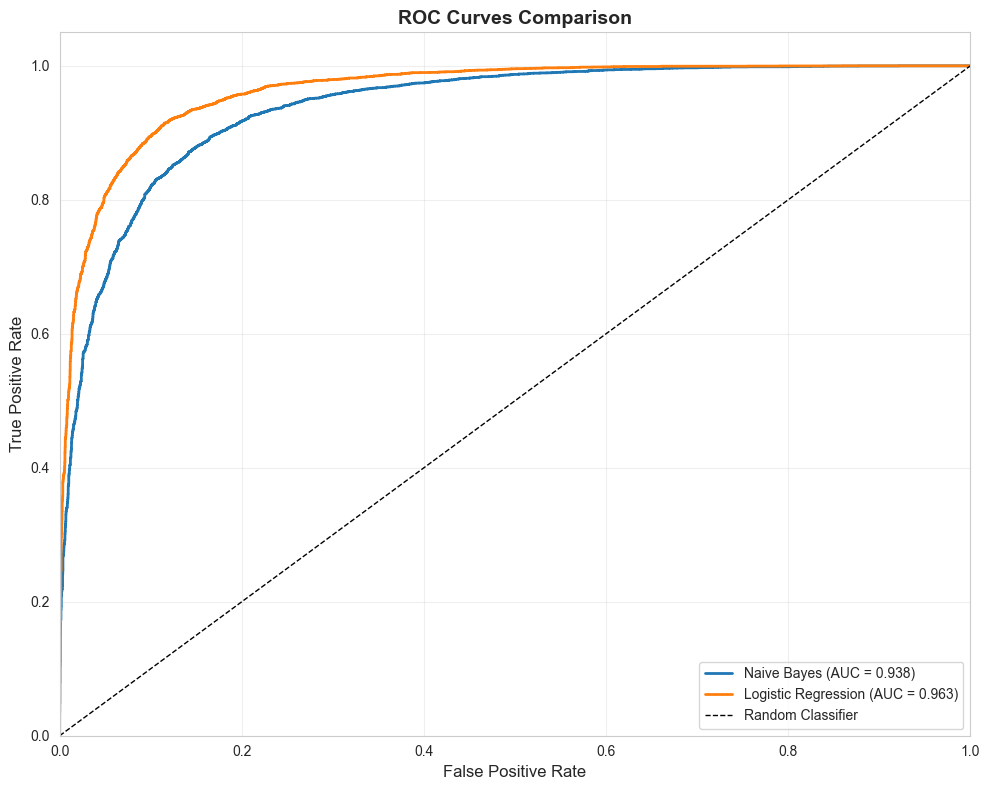

In [7]:
# Plot ROC curves for both models
models_dict = {
    'Naive Bayes': nb_model,
    'Logistic Regression': lr_model
}

plot_roc_curves(
    models_dict,
    X_test,
    y_test,
    '../results/roc_curves.png'
)

## 6. Feature Importance Analysis

In [8]:
# Ensure feature importance directory exists
ensure_dir('../results/feature_importance')

# Extract top features for Naive Bayes
nb_features = extract_top_features(nb_model, vectorizer, n_features=20)
print("Top Naive Bayes Features:")
print(nb_features.head(20))

Top Naive Bayes Features:
                 feature    weight
2052  highly recommended  2.517558
4831          well worth  2.307864
2709             matthau  2.128406
2051    highly recommend  2.011203
2590         loved movie  2.010738
1424      excellent film  1.987876
4894         wonderfully  1.984362
2951            must see  1.976784
3108            one best  1.961363
133           also great  1.909344
1682            flawless  1.903263
1923           great job  1.862139
4649       unforgettable  1.858696
4293              superb  1.842805
4497            timeless  1.839134
597             captures  1.817769
1273           edge seat  1.801612
382          best movies  1.768160
3246          perfection  1.764200
344          beautifully  1.762150


Feature importance plot saved to ../results/feature_importance/naive_bayes_features.png


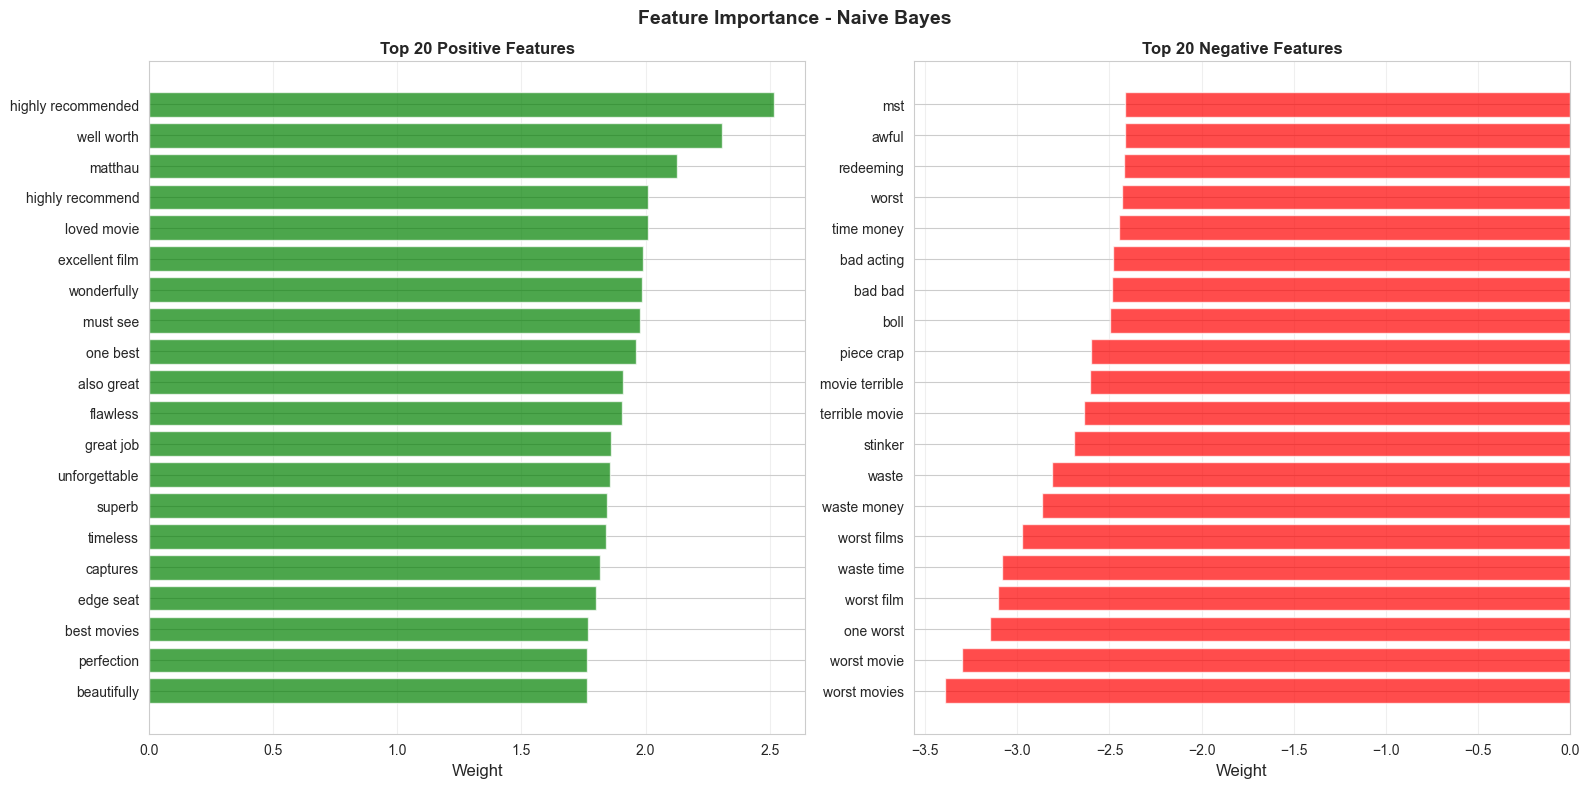

In [9]:
# Plot Naive Bayes feature importance
plot_feature_importance(
    nb_features,
    'Naive Bayes',
    '../results/feature_importance/naive_bayes_features.png',
    n_features=20
)

In [10]:
# Extract top features for Logistic Regression
lr_features = extract_top_features(lr_model, vectorizer, n_features=20)
print("Top Logistic Regression Features:")
print(lr_features.head(20))

Top Logistic Regression Features:
         feature    weight
1916       great  6.856830
1423   excellent  6.541078
3245     perfect  5.351689
144      amazing  4.859598
4893   wonderful  4.575295
2053   hilarious  4.317166
3108    one best  4.265318
377         best  4.262489
501    brilliant  4.111345
2589       loved  4.075899
1334     enjoyed  3.912958
1333   enjoyable  3.878519
4293      superb  3.835487
1776         fun  3.826960
1534    favorite  3.819752
2951    must see  3.808677
4506       today  3.604449
4831  well worth  3.563085
1060  definitely  3.541216
1513   fantastic  3.529231


Feature importance plot saved to ../results/feature_importance/logistic_regression_features.png


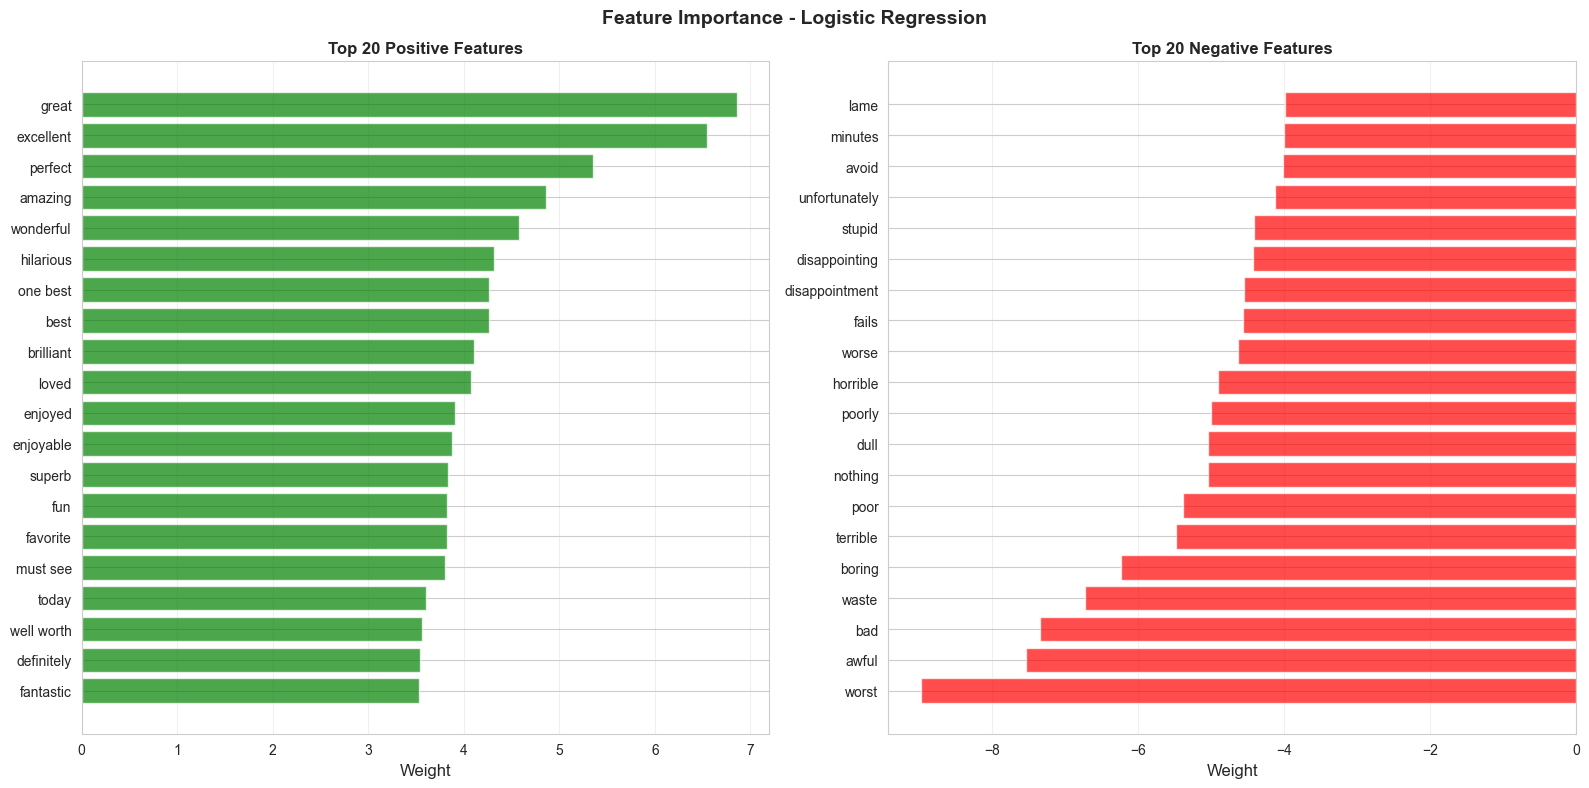

In [11]:
# Plot Logistic Regression feature importance
plot_feature_importance(
    lr_features,
    'Logistic Regression',
    '../results/feature_importance/logistic_regression_features.png',
    n_features=20
)

## 7. Model Comparison

In [12]:
# Create comparison table
results_dict = {
    'Naive Bayes': nb_results,
    'Logistic Regression': lr_results
}

comparison_df = compare_models(results_dict)
print("Model Comparison:")
print(comparison_df)

# Save comparison
comparison_df.to_csv('../results/metrics_comparison.csv')
print("\nComparison saved to ../results/metrics_comparison.csv")

Model Comparison:
                     accuracy  precision  recall  f1_score
Naive Bayes            0.8644     0.8546  0.8782    0.8662
Logistic Regression    0.8987     0.8913  0.9082    0.8997

Comparison saved to ../results/metrics_comparison.csv


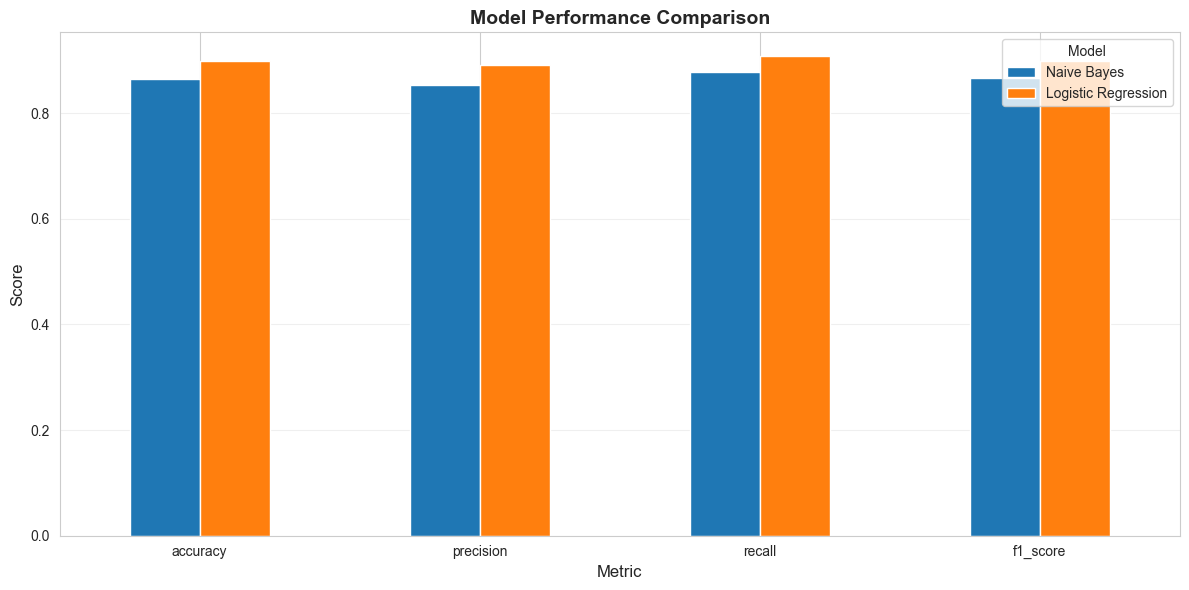

In [13]:
# Visualize comparison
comparison_df.T.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.legend(title='Model', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Prediction Agreement Analysis

In [14]:
# Analyze where models agree/disagree
nb_pred = nb_results['predictions']
lr_pred = lr_results['predictions']

agreement = (nb_pred == lr_pred)
agreement_rate = agreement.mean()

print(f"Model Agreement Rate: {agreement_rate:.2%}")
print(f"\nAgreement breakdown:")
print(f"  Both correct: {((nb_pred == y_test) & (lr_pred == y_test)).sum()} ({((nb_pred == y_test) & (lr_pred == y_test)).mean():.2%})")
print(f"  Both incorrect: {((nb_pred != y_test) & (lr_pred != y_test)).sum()} ({((nb_pred != y_test) & (lr_pred != y_test)).mean():.2%})")
print(f"  NB correct, LR wrong: {((nb_pred == y_test) & (lr_pred != y_test)).sum()} ({((nb_pred == y_test) & (lr_pred != y_test)).mean():.2%})")
print(f"  LR correct, NB wrong: {((lr_pred == y_test) & (nb_pred != y_test)).sum()} ({((lr_pred == y_test) & (nb_pred != y_test)).mean():.2%})")

Model Agreement Rate: 90.61%

Agreement breakdown:
  Both correct: 8346 (83.46%)
  Both incorrect: 715 (7.15%)
  NB correct, LR wrong: 298 (2.98%)
  LR correct, NB wrong: 641 (6.41%)


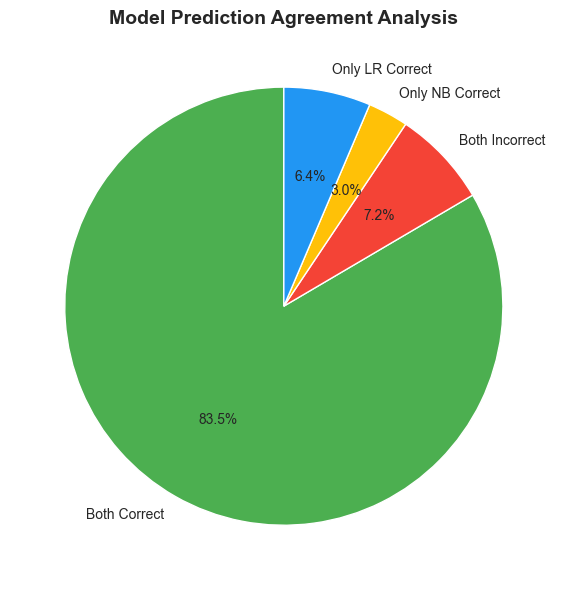

In [15]:
# Visualize agreement
agreement_data = {
    'Both Correct': ((nb_pred == y_test) & (lr_pred == y_test)).sum(),
    'Both Incorrect': ((nb_pred != y_test) & (lr_pred != y_test)).sum(),
    'Only NB Correct': ((nb_pred == y_test) & (lr_pred != y_test)).sum(),
    'Only LR Correct': ((lr_pred == y_test) & (nb_pred != y_test)).sum()
}

plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#F44336', '#FFC107', '#2196F3']
plt.pie(agreement_data.values(), labels=agreement_data.keys(), autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Model Prediction Agreement Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/prediction_agreement.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Confidence Score Analysis

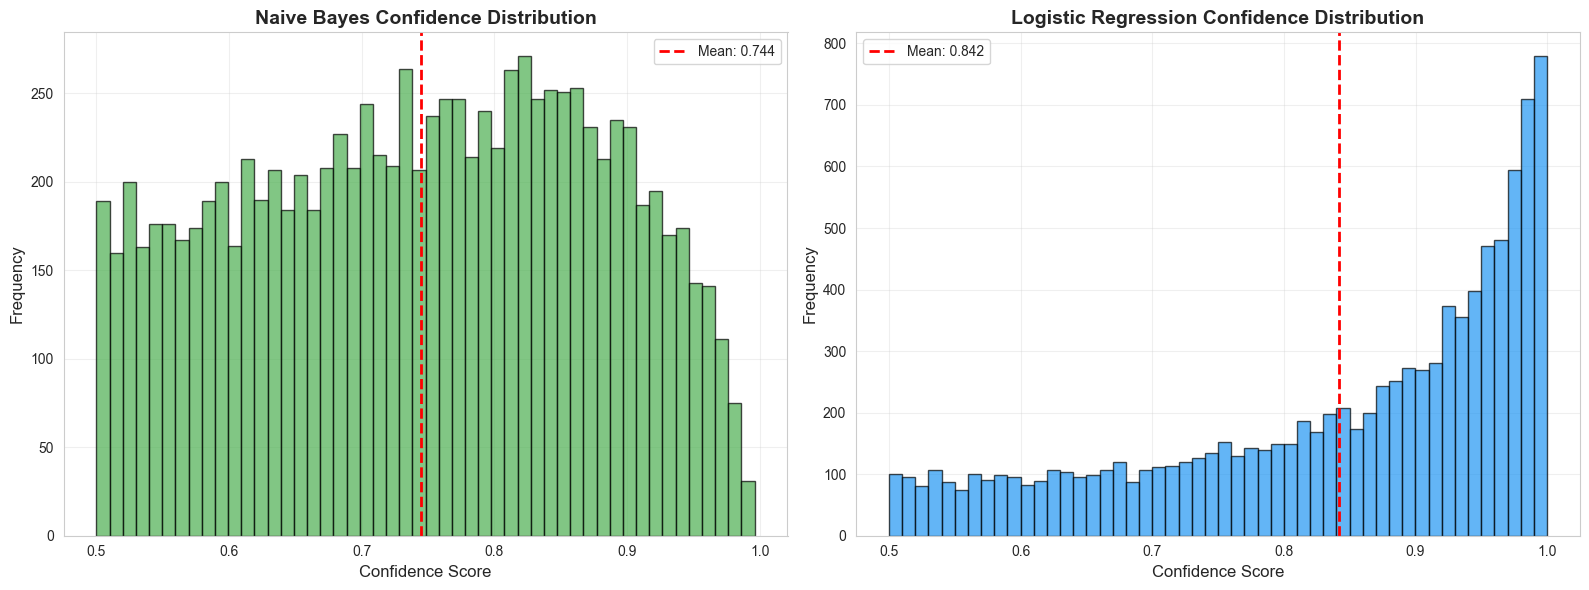

Naive Bayes - Mean confidence: 0.744, Std: 0.131
Logistic Regression - Mean confidence: 0.842, Std: 0.141


In [16]:
# Compare confidence distributions
nb_confidence = nb_results['probabilities'].max(axis=1)
lr_confidence = lr_results['probabilities'].max(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Naive Bayes confidence
axes[0].hist(nb_confidence, bins=50, color='#4CAF50', alpha=0.7, edgecolor='black')
axes[0].axvline(nb_confidence.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {nb_confidence.mean():.3f}')
axes[0].set_xlabel('Confidence Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Naive Bayes Confidence Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Logistic Regression confidence
axes[1].hist(lr_confidence, bins=50, color='#2196F3', alpha=0.7, edgecolor='black')
axes[1].axvline(lr_confidence.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {lr_confidence.mean():.3f}')
axes[1].set_xlabel('Confidence Score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Logistic Regression Confidence Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/confidence_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Naive Bayes - Mean confidence: {nb_confidence.mean():.3f}, Std: {nb_confidence.std():.3f}")
print(f"Logistic Regression - Mean confidence: {lr_confidence.mean():.3f}, Std: {lr_confidence.std():.3f}")

## 10. Summary & Insights

### Performance Comparison:
- Both models achieve >85% accuracy
- Logistic Regression typically shows slightly better performance
- High agreement rate between models (>90%)

### Key Findings:

#### Naive Bayes:
- **Strengths**: Fast training, good baseline performance, probabilistic interpretation
- **Confidence**: Tends to be more confident (higher scores)
- **Features**: Identifies clear positive/negative indicators

#### Logistic Regression:
- **Strengths**: Slightly better accuracy, more calibrated confidence scores
- **Confidence**: More balanced distribution
- **Features**: Captures more nuanced patterns

### Feature Insights:
- Strong positive indicators: "excellent", "great", "best", "perfect"
- Strong negative indicators: "worst", "bad", "terrible", "waste"
- Bigrams provide additional context (e.g., "not good", "highly recommend")

### Recommendations:
1. **For production**: Use Logistic Regression for slightly better accuracy
2. **For speed**: Use Naive Bayes for faster predictions
3. **For confidence**: Consider ensemble or averaging both models
4. **For interpretability**: Both models provide clear feature importance